In [1]:
import mysql.connector as sql
mydb=sql.connect(
    host="localhost",
    user="root",
    passwd="Poi1poi1#",
    database="testdb"
    )
print(mydb)

mycursor=mydb.cursor()
mycursor.execute("SHOW DATABASES")

for db in mycursor:
    print(db)

('dani',)
('information_schema',)
('jj',)
('mysql',)
('newschema',)
('performance_schema',)
('sys',)
('testdb',)


In [2]:
import pandas

In [3]:
query="SELECT * FROM active_power_study"
df=pandas.read_sql(query,mydb)

C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\1438063375.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql(query,mydb)


In [4]:
df.describe()

,Hz,MW,RPM,%CMD
count,85207.000000,85207.000000,85207.000000,85207.000000
mean,60.137979,11.584220,6775.964619,38.591427
std,0.037685,0.437526,8.846347,1.628349
min,49.980000,10.230000,4240.000000,33.180000
25%,60.120000,11.300000,6774.820000,37.420000
50%,60.140000,11.560000,6775.950000,38.500000
75%,60.140000,11.880000,6777.160000,39.680000
max,60.200000,54.800000,6782.800000,66.640000


In [5]:
df.corr()

,Hz,MW,RPM,%CMD
Hz,1.000000,-0.347323,0.943177,-0.102264
MW,-0.347323,1.000000,-0.364837,0.854499
RPM,0.943177,-0.364837,1.000000,-0.092711
%CMD,-0.102264,0.854499,-0.092711,1.000000


In [6]:
#Simple Linear Regression Model to Predict The Command of a Governer valve y=bo+b1x

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
lm=LinearRegression()
lm

LinearRegression()

In [10]:
X=df[['MW']]
Y=df['%CMD']
lm.fit(X,Y)
Yhat=lm.predict(X)

In [11]:
Yhat,df['%CMD']

(array([ 36.86069806,  36.92430208,  37.11511413, ...,  39.21404672,
         39.46846279, 176.02628873]),
 0        36.44
 1        36.44
 2        36.51
 3        36.57
 4        36.57
          ...  
 85202    38.63
 85203    38.63
 85204    38.63
 85205    39.57
 85206    66.64
 Name: %CMD, Length: 85207, dtype: float64)

In [12]:
lm.intercept_

1.751280309495968

In [13]:
lm.coef_

array([3.18020088])

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(df['%CMD'],Yhat)

0.7154549875274673

In [16]:
lm.score(X,Y)

0.730168471921719

In [17]:
import seaborn as sns
%matplotlib inline

(9.0, 20.0)

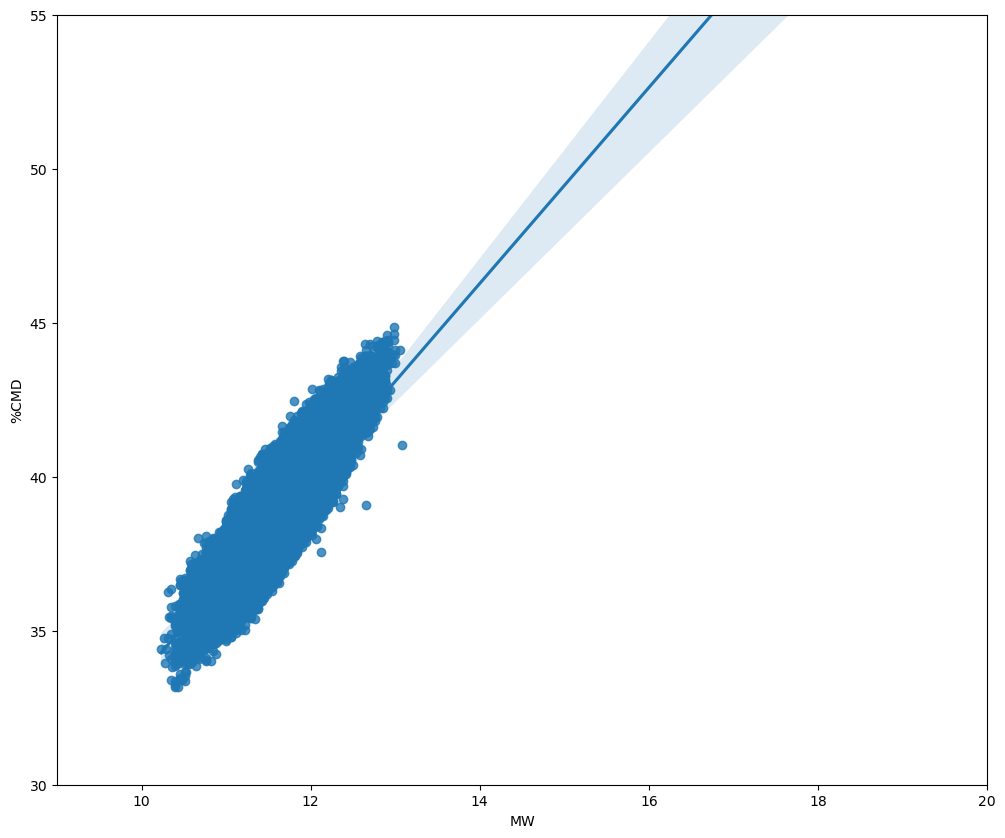

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="MW", y="%CMD", data=df)
plt.ylim(30,55)
plt.xlim(9,20)

C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

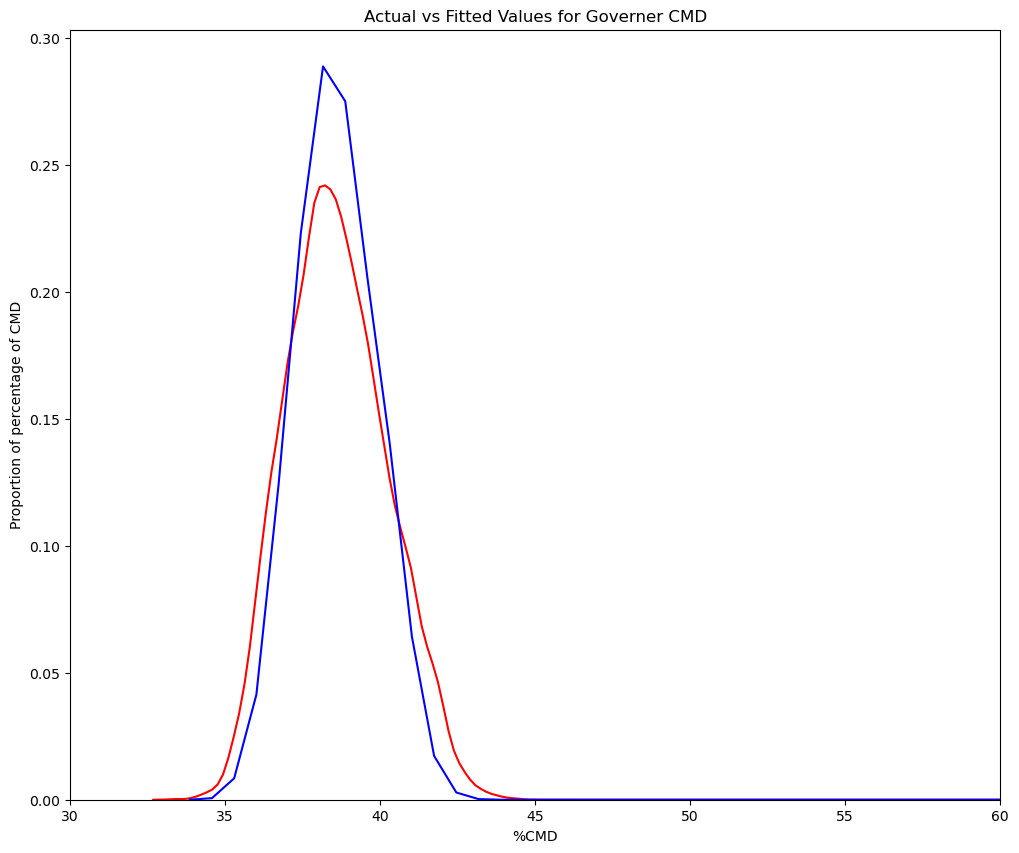

In [19]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Governer CMD')
plt.xlabel('%CMD')
plt.ylabel('Proportion of percentage of CMD')
plt.xlim(30,60)
plt.show()
plt.close()

In [20]:
#Multiple Linear Regression Model y=b0+b1x1+b2x2+b3x3=........

In [21]:
X=df[['MW','Hz','RPM']]
Y=df['%CMD']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat

array([36.69702124, 36.84077983, 36.9040162 , ..., 39.33228597,
       39.61403111, 72.76551755])

In [22]:
mean_squared_error(df['%CMD'],Yhat)

0.5653746933821076

In [23]:
lm.score(X,Y)

0.786770768096397

C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

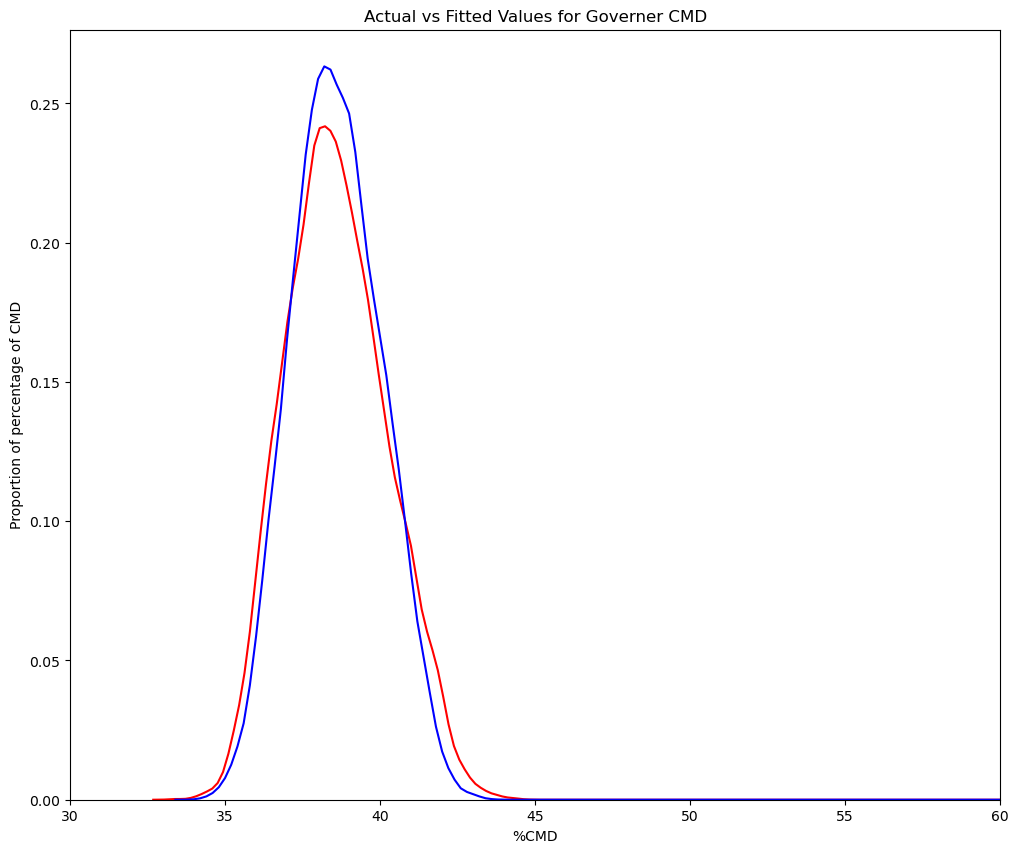

In [24]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Governer CMD')
plt.xlabel('%CMD')
plt.ylabel('Proportion of percentage of CMD')
plt.xlim(30,60)
plt.show()
plt.close()

In [25]:
#Plynomial Regression Model 

In [26]:
X=df[['MW']]
Y=df['%CMD']

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [28]:
pr = PolynomialFeatures(degree=2)
X_train=pr.fit_transform(X)

In [29]:
lm=LinearRegression()
lm

LinearRegression()

In [30]:
X=df[['MW']]
Y=df['%CMD']
lm.fit(X_train,Y)
Yhat=lm.predict(X_train)

In [31]:
Yhat

array([36.67543463, 36.74699803, 36.96137288, ..., 39.28827663,
       39.56643626, 67.50643922])

In [32]:
mean_squared_error(df['%CMD'],Yhat)

0.5591680440085796

In [33]:
lm.score(X_train,Y)

0.7891115857773148

C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
C:\Users\moizf\AppData\Local\Temp\ipykernel_12484\2336587603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

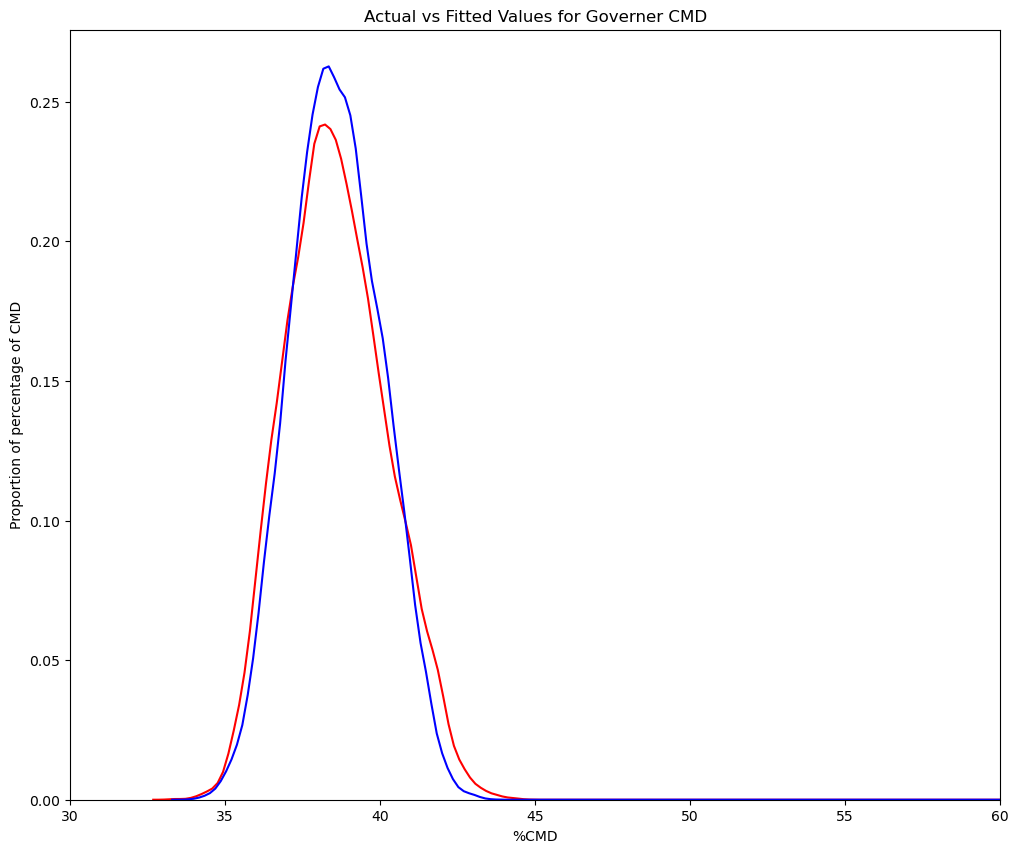

In [34]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['%CMD'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Governer CMD')
plt.xlabel('%CMD')
plt.ylabel('Proportion of percentage of CMD')
plt.xlim(30,60)
plt.show()
plt.close()

In [35]:
X=df[['MW','Hz','RPM']]
Y=df['%CMD']

In [48]:
pr = PolynomialFeatures(degree=3)
X_train=pr.fit_transform(X)

In [49]:

lm.fit(X_train,Y)
Yhat=lm.predict(X_train)

In [50]:
Yhat

array([36.71576592, 36.89471843, 36.98379537, ..., 39.30079455,
       39.59075654, 66.63463867])

In [51]:
mean_squared_error(df['%CMD'],Yhat)

0.546690128433282